In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
df_train = pd.read_csv("Azra Marketing - Train.csv")
df_test =pd.read_csv("Azra Marketing - Test.csv")

In [9]:
X_train = df_train.drop('deposit', axis=1)
y_train = df_train['deposit']
X_test = df_test.drop('deposit', axis=1)
y_test = df_test['deposit']

In [10]:
X_train.shape, X_test.shape

((8929, 40), (2233, 40))

### Using Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#### DT with depth 2

In [12]:
dt_2 = DecisionTreeClassifier(random_state=42, max_depth=2)

In [13]:
dt_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
from sklearn.tree import plot_tree

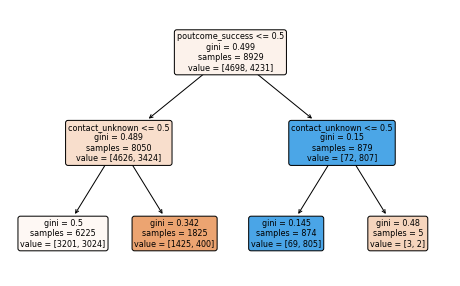

In [15]:
plt.figure(figsize=[8,5])
plot_tree(dt_2, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

#### Decision Tree with no depth control

In [16]:
dt = DecisionTreeClassifier(random_state=42)

In [17]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

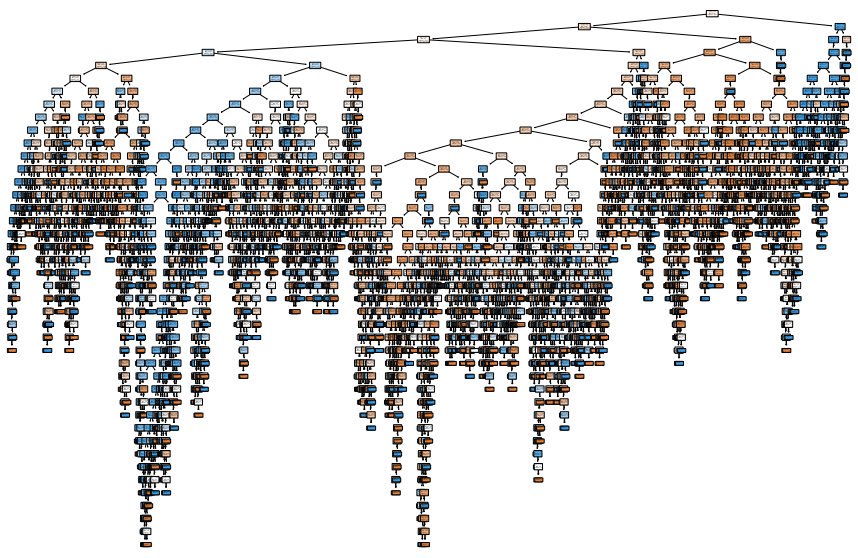

In [50]:
plt.figure(figsize=[15,10])
plot_tree(dt, filled=True, rounded=True)
plt.show()

Performance of the decision tree with depth 2

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_train_pred = dt_2.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, y_train_pred))

Train accuracy: 0.6085787882181656


In [20]:
y_test_pred = dt_2.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Test accuracy: 0.5929243170622481


Performance of the decision tree with no depth control

In [21]:
y_train_pred = dt.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, y_train_pred))

Train accuracy: 0.9992160376301937


In [22]:
y_test_pred = dt.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Test accuracy: 0.6077026421854008


### Section: Perform your own manual hyper-parameter tuning

In [23]:
depth_vals = range(1,16)
candidate_score = []

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
for depth in depth_vals:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=4, scoring='accuracy')
    candidate_score.append(cv_scores.mean())

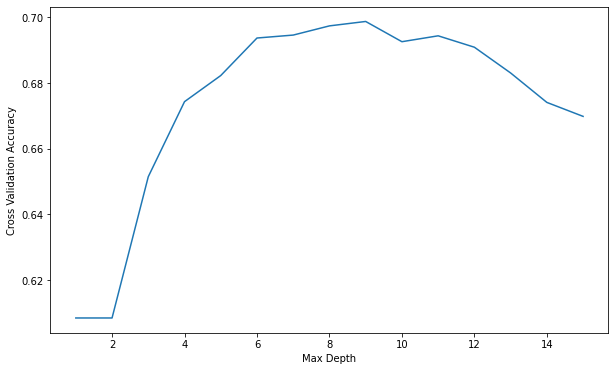

In [28]:
plt.figure(figsize=[10,6])
plt.plot(depth_vals, candidate_score)
plt.xlabel("Max Depth")
plt.ylabel("Cross Validation Accuracy")
plt.show()

### Section: GridSearchCV - Grid Search with Cross-Validation

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list o

### Section: Using GridSearchCV for hyper-parameter tuning

In [74]:
dt = DecisionTreeClassifier(random_state=42)

In [75]:
hyper_params = {'max_depth': depth_vals}

In [77]:
model_cv = GridSearchCV(estimator=dt, 
             param_grid=hyper_params,
             scoring='accuracy',
             cv=4,
             n_jobs=-1, 
             verbose=2,
             return_train_score=True)

In [78]:
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 16)}, return_train_score=True,
             scoring='accuracy', verbose=2)

In [79]:
print(model_cv.best_estimator_)
print(model_cv.best_score_)

DecisionTreeClassifier(max_depth=9, random_state=42)
0.6987342236925107


In [80]:
cv_df = pd.DataFrame(model_cv.cv_results_)
print(cv_df.shape)
cv_df.head()

(15, 19)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.022436,0.001793,0.006732,0.001086,1,{'max_depth': 1},0.605464,0.616487,0.605287,0.606631,0.608467,0.004659,15,0.609468,0.605794,0.609527,0.609079,0.608467,0.001553
1,0.024926,0.001732,0.006234,0.000828,2,{'max_depth': 2},0.605464,0.616487,0.605735,0.606183,0.608467,0.004638,14,0.609618,0.605943,0.609527,0.609377,0.608616,0.001546
2,0.034407,0.000865,0.005984,0.000705,3,{'max_depth': 3},0.649798,0.652330,0.648746,0.655018,0.651473,0.002426,13,0.652927,0.652382,0.653278,0.650142,0.652182,0.001220
3,0.042637,0.005055,0.007480,0.001495,4,{'max_depth': 4},0.672638,0.680556,0.669803,0.674283,0.674320,0.003941,10,0.678614,0.677169,0.680305,0.676721,0.678202,0.001401
4,0.042633,0.001919,0.005235,0.000431,5,{'max_depth': 5},0.682938,0.689068,0.676523,0.680556,0.682271,0.004545,9,0.687575,0.689264,0.701209,0.685680,0.690932,0.006068


### Section: GridSearchCV with multiple hyper-parameters

In [32]:
dt = DecisionTreeClassifier(random_state=42)

In [33]:
hyper_params = {'max_depth': [3, 5, 7, 9, 11, 13, 15],
                'max_features': [3, 4, 5, 6, 7],
                'min_samples_leaf': [5, 10, 15, 20, 35, 50]
               }

In [34]:
model_cv = GridSearchCV(estimator=dt, 
             param_grid=hyper_params,
             verbose=1,
             cv=4,
             n_jobs=-1,
             return_train_score=True)

In [35]:
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 20, 35, 50]},
             return_train_score=True, verbose=1)

In [36]:
print(model_cv.best_estimator_)
print(model_cv.best_score_)

DecisionTreeClassifier(max_depth=13, max_features=7, min_samples_leaf=15,
                       random_state=42)
0.6983983025070345


### Section: The effect of each hyper-parameter

In [37]:
cv_df = pd.DataFrame(model_cv.cv_results_)
print(cv_df.shape)
cv_df.columns

(210, 21)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [38]:
cv_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.027410,0.008220,0.016901,0.008768,3,3,5,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.625168,0.633065,...,0.630824,0.632434,0.005563,172,0.635603,0.634314,0.631775,0.635060,0.634188,0.001466
1,0.025162,0.006603,0.019444,0.016640,3,3,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.625168,0.632168,...,0.630824,0.631986,0.005213,173,0.635603,0.632970,0.630432,0.633418,0.633106,0.001837
2,0.016801,0.002037,0.015456,0.000856,3,3,15,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.625168,0.632168,...,0.630824,0.631986,0.005213,173,0.635603,0.632970,0.630432,0.633418,0.633106,0.001837


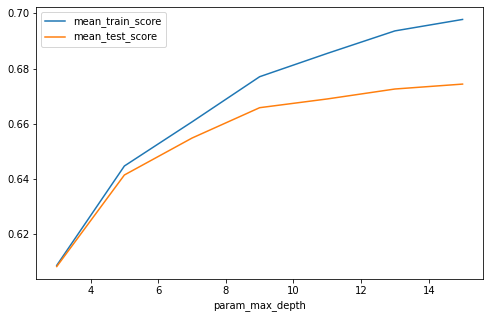

In [39]:
res = cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].mean()
res.plot(figsize=[8,5])
plt.show()

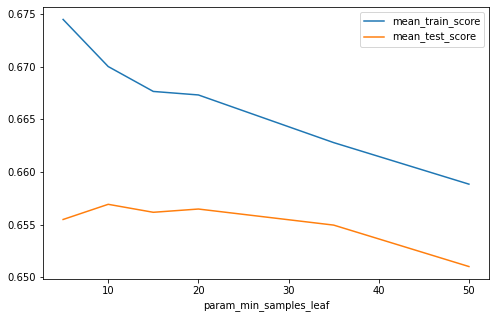

In [40]:
res = cv_df.groupby('param_min_samples_leaf')['mean_train_score', 'mean_test_score'].mean()
res.plot(figsize=[8,5])
plt.show()

### Section: Limitations of exhaustive methods (looping, GridSearchCV)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [42]:
hyper_params = {'max_depth': [3, 5, 7, 9, 11, 13, 15],
                'max_features': [3, 4, 5, 6, 7],
                'min_samples_leaf': [5, 10, 15, 20, 35, 50]
               }

In [43]:
rf_grids = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=4,
             n_jobs=-1,
             return_train_score=True)

In [44]:
%%time
rf_grids.fit(X_train, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits
Wall time: 2min 51s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 20, 35, 50]},
             return_train_score=True, verbose=1)

In [45]:
print(rf_grids.best_estimator_)
print(rf_grids.best_score_)

RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)
0.7199025251722693


### Section: RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [55]:
hyper_params = {'max_depth': [3, 5, 7, 9, 11, 13, 15],
                'max_features': [3, 4, 5, 6, 7],
                'min_samples_leaf': [5, 10, 15, 20, 35, 50]
               }

In [56]:
rf_randoms = RandomizedSearchCV(estimator=rf, 
             param_distributions=hyper_params,
             cv=4,
             n_iter=25,
             verbose=1,
             n_jobs=-1)

In [57]:
%%time
rf_randoms.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Wall time: 19.2 s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                                        'max_features': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [5, 10, 15, 20, 35,
                                                             50]},
                   verbose=1)

In [58]:
print(rf_randoms.best_estimator_)
print(rf_randoms.best_score_)

RandomForestClassifier(max_depth=9, max_features=6, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)
0.7193424391700254


### Section: Choosing the ‘best’ model

In [147]:
sel_cols = ['param_max_depth',
            'param_max_features',
            'param_min_samples_leaf',
            'mean_test_score']

cv_df.sort_values(by='mean_test_score', ascending=False)[sel_cols]\
        .head(20)\
        .reset_index(drop=True)

,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,15,6,5,0.719902
1,9,6,5,0.719342
2,11,4,5,0.718558
3,15,7,10,0.717327
4,15,6,15,0.716879
5,13,7,15,0.716655
6,13,5,15,0.715983
7,11,7,10,0.715871
8,15,7,20,0.715087
9,15,4,20,0.714638


### Section: Training on the entire data and making predictions

In [59]:
dt_best = rf_randoms.best_estimator_

In [60]:
dt_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=6, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)

In [61]:
y_test_pred = dt_best.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.5987460815047022
